In [1]:
import numpy as np
import pandas as pd
import math
import copy
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tabulate import tabulate
from pylab import rcParams

The first step is always to read in the data and take a look at what it looks like. 

In [2]:
train_x = pd.read_csv("./EECS6720-hw1-data/X_train.csv", header = None)
test_x = pd.read_csv("./EECS6720-hw1-data/X_test.csv", header = None)
train_y = pd.read_csv("./EECS6720-hw1-data/label_train.csv", header = None)
test_y = pd.read_csv("./EECS6720-hw1-data/label_test.csv", header = None)

In [3]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(4140, 54) (461, 54) (4140, 1) (461, 1)


In [4]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,3,3,5,0,2,3,3,1,0,10,...,0,0,0,0,0,2,0,4,2,1
1,1,0,8,0,13,2,2,2,7,3,...,1,1,0,0,1,2,0,3,2,1
2,0,0,0,0,7,0,4,7,4,7,...,0,0,0,0,0,2,0,2,0,0
3,0,0,0,0,7,0,4,7,4,7,...,0,0,0,0,0,2,0,2,0,0
4,0,0,0,0,19,0,0,19,0,0,...,0,0,0,0,0,3,0,0,0,0


In [5]:
num_spam = int(train_y.sum())
N = train_y.shape[0]

We can easily calculate the value of $p(y^{*} = 1|y)$ and $p(y^{*} = 0|y)$ as they are given in the question.

In [6]:
prob_y1 = (1+num_spam)/(N + 2)
prob_y0 = (1 + (N-num_spam))/(N+2)

In [7]:
spam_x = train_x[ :1631]
non_spam_x = train_x[1631:]

In [8]:
print(spam_x.shape, non_spam_x.shape)

(1631, 54) (2509, 54)


In [9]:
spam_x = spam_x.values
non_spam_x = non_spam_x.values

In [10]:
sum_spam_x = [spam_x[:,i].sum() for i in range(spam_x.shape[1])]
sum_non_spam_x = [non_spam_x[:, i].sum() for i in range(non_spam_x.shape[1])]

In [11]:
sp_predictions = []
sp_prob_1 = []
sp_prob_0 = []


for j in range(test_x.shape[0]):
    try:
        x_star = test_x.iloc[j]
        predict_1 = 1
        predict_0 = 1

        for i in range(54):
            p = (num_spam + 1)/(num_spam + 2)
            k = x_star[i]
            n = sum_spam_x[i] + 1
            temp = sp.nbinom.logpmf(k, n, p)
            predict_1 *= math.exp(temp)

            p = (N - num_spam + 1)/(N - num_spam + 2)
            n = sum_non_spam_x[i] + 1
            temp = sp.nbinom.logpmf(k, n, p)
            predict_0 *= math.exp(temp)

        predict_1 *= prob_y1
        predict_0 *= prob_y0

        p1 = predict_1/(predict_1 + predict_0)
        p0 = predict_0/(predict_1 + predict_0)

        sp_prob_1.append(p1)
        sp_prob_0.append(p0)

        if p1 > p0:
            sp_predictions.append(1)
        else:
            sp_predictions.append(0)
        
    except:
        sp_predictions.append(0)
        sp_prob_1.append(0)
        sp_prob_0.append(0)

In [27]:
sp_spam_pred = sp_predictions[:182]
sp_non_pred = sp_predictions[182:]

tn = 0
tp = 0
fn = 0
fp = 0

for i in range(len(sp_spam_pred)):
    if sp_spam_pred[i] == 1:
        tp += 1
    else:
        fn += 1

for i in range(len(sp_non_pred)):
    if sp_non_pred[i] == 0:
        tn += 1
    else:
        fp += 1
        
print(tn, tp, fn, fp)

231 171 11 48


Below is my own implementation of the scipy.stat.nbinom.logpmf function, however this is much slower. I wanted to include it because I am proud that it works. 

In [20]:
# write predictions and probabilities to a csv
predictions = np.array(sp_predictions)
prob_1 = np.array(sp_prob_1)
prob_0 = np.array(sp_prob_0)

In [23]:
pred = pd.DataFrame(predictions)
p1 = pd.DataFrame(prob_1)
p0 = pd.DataFrame(prob_0)
pred.to_csv("./EECS6720-hw1-data/predictions.csv", header = None, index = False)
p1.to_csv("./EECS6720-hw1-data/prob1.csv", header = None, index = False)
p0.to_csv("./EECS6720-hw1-data/prob0.csv", header = None, index = False)

In [29]:
x_label = ['make', 'address', 'all', '3d', 'our', 'over','remove','internet','order', 'mail','receive','will','people','report','addresses','free',
'business','email','you','credit','your','font','000','money','hp','hpl','george','650','lab','labs','telnet','857','data','415','85','technology',
'1999','parts','pm','direct','cs','meeting','original','project','re','edu','table','conference',';','(','[','!','$','#']

In [31]:
email1 = test_x.iloc[2]
email2 = test_x.iloc[25]
email3 = test_x.iloc[184]

In [32]:
e_lambda1 = (np.array(sum_spam_x) + 1)/(1 + num_spam)
e_lambda0 = (np.array(sum_non_spam_x) + 1)/(1 + (N-num_spam))
email1 = email1.values
email2 = email2.values
email3 = email3.values

In [33]:
email4 = test_x.iloc[392]
email5 = test_x.iloc[397]
email6 = test_x.iloc[431]
email4 = email4.values
email5 = email5.values
email6 = email6.values

In [35]:
x_label = pd.DataFrame(x_label)
email1 = pd.DataFrame(email1)
email2 = pd.DataFrame(email2)
email3 = pd.DataFrame(email3)
email4 = pd.DataFrame(email4)
email5 = pd.DataFrame(email5)
email6 = pd.DataFrame(email6)
e_lambda0 = pd.DataFrame(e_lambda0)
e_lambda1 = pd.DataFrame(e_lambda1)

In [36]:
emails = [x_label, email1, email2, email3, email4, email5, email6, e_lambda0, e_lambda1]
email0 = pd.concat(emails, axis = 1)

In [37]:
email0.to_csv("./EECS6720-hw1-data/dataForGraphs.csv", header = ['word','email1', 'email2', 'email3', 'email4', 'email5', 'email6', 'e_lambda0', 'e_lambda1'], index = False)

## 4b. Confusion Matrix

In [38]:
print (tabulate([['Actual Spam', tp, fn], ['Actual Non Spam', fp, tn]], headers=['Predicted Spam', 'Predicted Non Spam']))

                   Predicted Spam    Predicted Non Spam
---------------  ----------------  --------------------
Actual Spam                   171                    11
Actual Non Spam                48                   231


## 4c. Plots 1

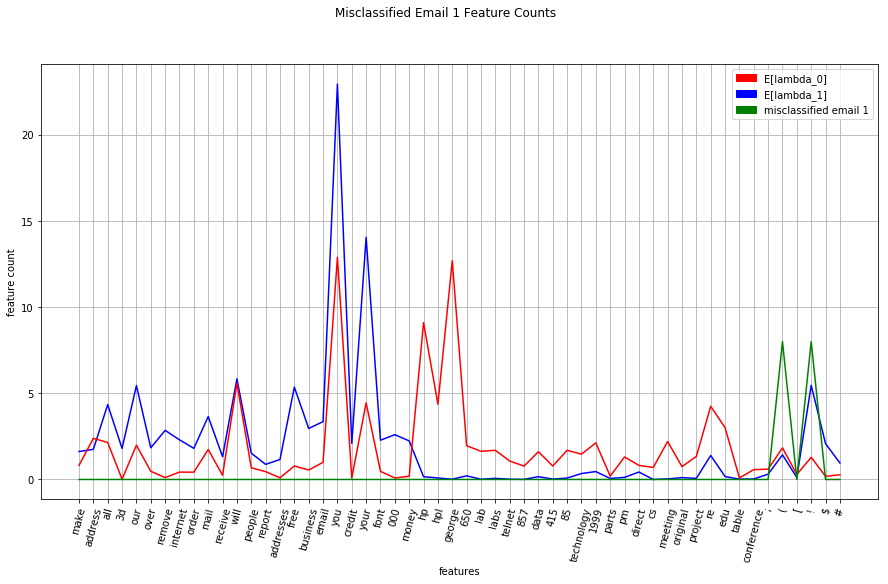

In [154]:
rcParams['figure.figsize'] = 15, 8
plt.plot(x_label[:], e_lambda1[:], 'b-', x_label[:], e_lambda0[:], 'r-', x_label[:], email1[:], 'g-')
plt.suptitle('Misclassified Email 1 Feature Counts')
plt.xlabel('features')
plt.ylabel('feature count')
plt.xticks(rotation=75)
plt.grid(which='major', axis='both')
red_patch = mpatches.Patch(color = 'red', label = 'E[lambda_0]')
blue_patch = mpatches.Patch(color = 'blue', label = 'E[lambda_1]')
green_patch = mpatches.Patch(color = 'green', label = 'misclassified email 1')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.show()

The predictive probabilities for this email are 0.9287688074787116 for class 0 (non-spam) and 0.07123119252128839 for class 1 (spam).

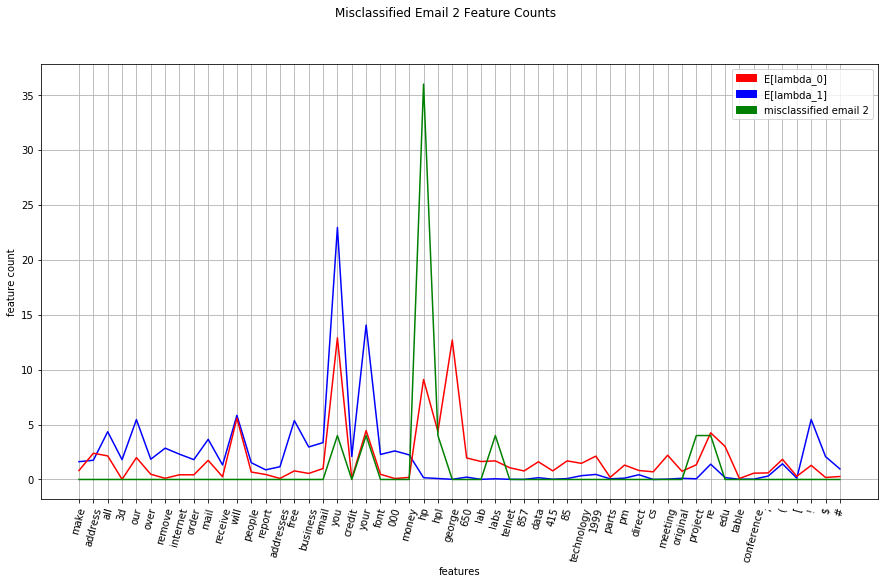

In [155]:
rcParams['figure.figsize'] = 15, 8
plt.plot(x_label[:], e_lambda1[:], 'b-', x_label[:], e_lambda0[:], 'r-', x_label[:], email2[:], 'g-')
plt.suptitle('Misclassified Email 2 Feature Counts')
plt.xlabel('features')
plt.ylabel('feature count')
plt.xticks(rotation=75)
plt.grid(which='major', axis='both')
red_patch = mpatches.Patch(color = 'red', label = 'E[lambda_0]')
blue_patch = mpatches.Patch(color = 'blue', label = 'E[lambda_1]')
green_patch = mpatches.Patch(color = 'green', label = 'misclassified email 2')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.show()

The predictive probabilities for this email are 1.0 for class 0 (non-spam) and 1.1315568627013843e-84 for class 1 (spam).

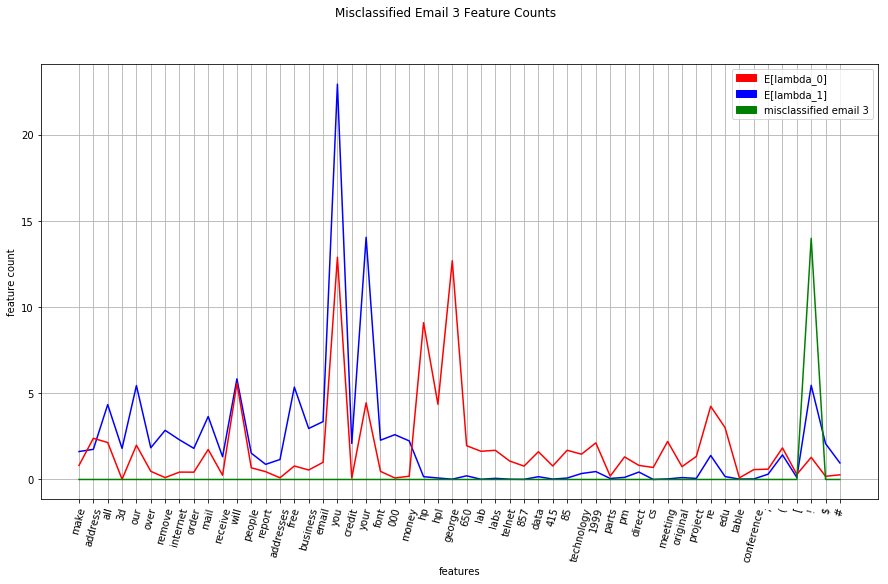

In [230]:
rcParams['figure.figsize'] = 15, 8
plt.plot(x_label[:], e_lambda1[:], 'b-', x_label[:], e_lambda0[:], 'r-', x_label[:], email3[:], 'g-')
plt.suptitle('Misclassified Email 3 Feature Counts')
plt.xlabel('features')
plt.ylabel('feature count')
plt.xticks(rotation=75)
plt.grid(which='major', axis='both')
red_patch = mpatches.Patch(color = 'red', label = 'E[lambda_0]')
blue_patch = mpatches.Patch(color = 'blue', label = 'E[lambda_1]')
green_patch = mpatches.Patch(color = 'green', label = 'misclassified email 3')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.show()

The predictive probabilities for this email are 0.00030084561680570064 for class 0 (non-spam) and 0.9996991543831942 for class 1 (spam).

## 4d. Plots 2

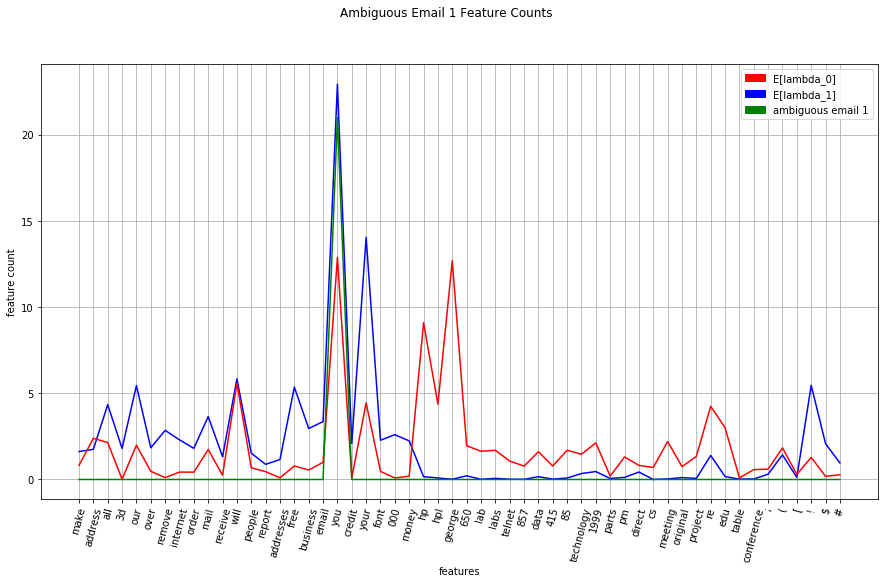

In [222]:
rcParams['figure.figsize'] = 15, 8
plt.plot(x_label[:], e_lambda1[:], 'b-', x_label[:], e_lambda0[:], 'r-', x_label[:], email4[:], 'g-')
plt.suptitle('Ambiguous Email 1 Feature Counts')
plt.xlabel('features')
plt.ylabel('feature count')
plt.xticks(rotation=75)
plt.grid(which='major', axis='both')
red_patch = mpatches.Patch(color = 'red', label = 'E[lambda_0]')
blue_patch = mpatches.Patch(color = 'blue', label = 'E[lambda_1]')
green_patch = mpatches.Patch(color = 'green', label = 'ambiguous email 1')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.show()

The predictive probabilities for this email are 0.5106202773607594 for class 0 (non-spam) and 0.48937972263924046 for class 1 (spam).

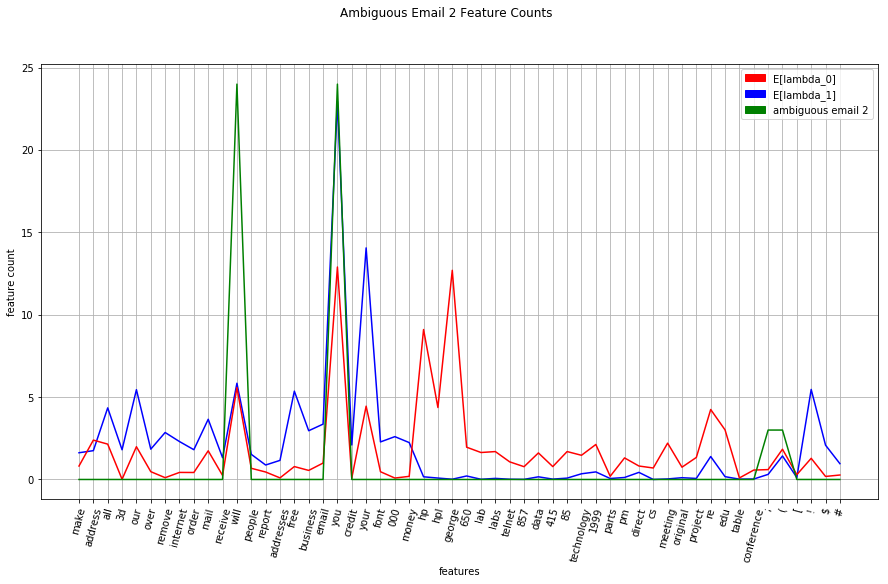

In [223]:
rcParams['figure.figsize'] = 15, 8
plt.plot(x_label[:], e_lambda1[:], 'b-', x_label[:], e_lambda0[:], 'r-', x_label[:], email5[:], 'g-')
plt.suptitle('Ambiguous Email 2 Feature Counts')
plt.xlabel('features')
plt.ylabel('feature count')
plt.xticks(rotation=75)
plt.grid(which='major', axis='both')
red_patch = mpatches.Patch(color = 'red', label = 'E[lambda_0]')
blue_patch = mpatches.Patch(color = 'blue', label = 'E[lambda_1]')
green_patch = mpatches.Patch(color = 'green', label = 'ambiguous email 2')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.show()

The predictive probabilities for this email are 0.4857823900756083 for class 0 (non-spam) and 0.5142176099243917 for class 1 (spam).

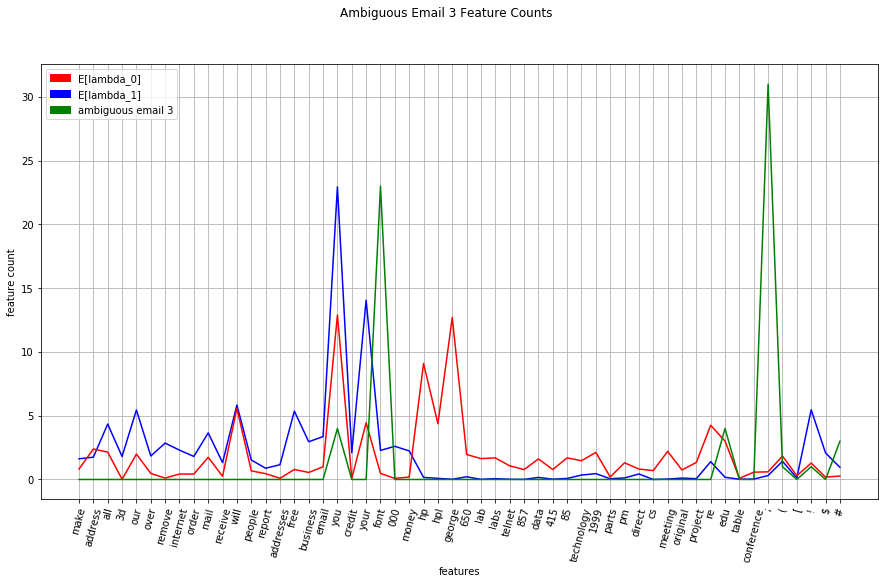

In [226]:
rcParams['figure.figsize'] = 15, 8
plt.plot(x_label[:], e_lambda1[:], 'b-', x_label[:], e_lambda0[:], 'r-', x_label[:], email6[:], 'g-')
plt.suptitle('Ambiguous Email 3 Feature Counts')
plt.xlabel('features')
plt.ylabel('feature count')
plt.xticks(rotation=75)
plt.grid(which='major', axis='both')
red_patch = mpatches.Patch(color = 'red', label = 'E[lambda_0]')
blue_patch = mpatches.Patch(color = 'blue', label = 'E[lambda_1]')
green_patch = mpatches.Patch(color = 'green', label = 'ambiguous email 3')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.show()

The predictive probabilities for this email are 0.5230722439385757 for class 0 (non-spam) and 0.47692775606142435 for class 1 (spam).